### Install required packages (one time setup)

In [1]:
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install seaborn
! pip install sklearn
! pip install xgboost

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Load given data

In [2]:
# Load spreadsheet
xl = pd.ExcelFile('assessment.xlsx')

# Load a sheet into a DataFrame by name
df = xl.parse('Data')
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset and basic info
df_info = df.info()
df_head = df.head()
df_describe = df.describe

df_head, df_info, df_describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66083 entries, 0 to 66082
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   C_ID             66083 non-null  int64  
 1   C_AGE            66083 non-null  int64  
 2   C_EDU            27619 non-null  object 
 3   C_HSE            22167 non-null  object 
 4   PC               65597 non-null  float64
 5   INCM_TYP         36617 non-null  float64
 6   gn_occ           65205 non-null  object 
 7   NUM_PRD          66083 non-null  int64  
 8   CASATD_CNT       40991 non-null  float64
 9   MTHCASA          39045 non-null  float64
 10  MAXCASA          39045 non-null  float64
 11  MINCASA          39045 non-null  float64
 12  DRvCR            29708 non-null  float64
 13  MTHTD            14100 non-null  float64
 14  MAXTD            14100 non-null  float64
 15  Asset value      66083 non-null  float64
 16  HL_tag           2368 non-null   float64
 17  AL_tag      

(   C_ID  C_AGE     C_EDU                  C_HSE       PC  INCM_TYP  \
 0  1443     65   Masters  EXECUTIVE CONDOMINIUM  19250.0       6.0   
 1  1559     86  O-Levels    PRIVATE CONDOMINIUM  99018.0       2.0   
 2  1913     69  A-Levels                    NaN  10155.0       3.0   
 3  2032     70       NaN                    NaN  21863.0       2.0   
 4  2048     72  O-Levels  EXECUTIVE CONDOMINIUM  10641.0       NaN   
 
         gn_occ  NUM_PRD  CASATD_CNT   MTHCASA   MAXCASA   MINCASA  \
 0         PMEB        3         8.0   6896.91   4899.08    910.88   
 1         PMEB        4        13.0  51714.78  35740.55   1318.25   
 2         PMEB        4         1.0   5420.09   5420.09   5420.09   
 3      RETIREE        3         1.0  13596.65  13596.65  13596.65   
 4  BLUE COLLAR        4         2.0  51639.18  32689.93  18949.25   
 
           DRvCR      MTHTD      MAXTD  Asset value  HL_tag  AL_tag  \
 0  1.020768e+06  105000.00   25000.00    111896.91     NaN     NaN   
 1  8.32

In [3]:
df.describe()

,C_ID,C_AGE,PC,INCM_TYP,NUM_PRD,CASATD_CNT,MTHCASA,MAXCASA,MINCASA,DRvCR,MTHTD,MAXTD,Asset value,HL_tag,AL_tag,pur_price_avg,UT_AVE,MAXUT,N_FUNDS,CC_AVE,MAX_MTH_TRN_AMT,MIN_MTH_TRN_AMT,AVG_TRN_AMT,ANN_TRN_AMT,ANN_N_TRX,CC_LMT
count,66083.000000,66083.000000,65597.000000,36617.000000,66083.000000,40991.000000,3.904500e+04,3.904500e+04,3.904500e+04,2.970800e+04,1.410000e+04,1.410000e+04,6.608300e+04,2368.0,5587.0,5.585000e+03,2.678000e+03,2.678000e+03,2678.000000,17073.000000,11733.000000,11733.000000,11733.000000,1.173300e+04,11733.000000,47744.000000
mean,41321.249111,52.357429,43249.703264,3.791709,2.097983,1.727867,1.614598e+04,1.544520e+04,1.317587e+04,3.663201e+04,1.075480e+05,6.738959e+04,3.606658e+04,1.0,1.0,1.247173e+05,4.562678e+04,5.207089e+04,1.447722,1433.442515,2812.945083,382.766932,848.137686,1.017765e+04,64.922952,5408.238040
std,27485.202813,14.323447,25671.057340,1.717852,1.093081,1.411307,6.683559e+04,6.505494e+04,5.443935e+04,1.330104e+05,1.770551e+05,1.166629e+05,1.161096e+05,0.0,0.0,8.775365e+04,5.447327e+04,6.140188e+04,0.920481,5016.886579,7971.455090,1028.178858,2690.348744,3.228418e+04,85.592620,13220.464962
min,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,-2.094051e+05,-2.094051e+05,-2.094051e+05,0.000000e+00,7.976200e+02,7.976200e+02,0.000000e+00,1.0,1.0,1.360000e+04,6.750000e-02,7.000000e-02,1.000000,0.000000,0.100000,0.040000,0.008333,1.000000e-01,1.000000,0.000000
25%,17402.000000,42.000000,21636.000000,2.000000,1.000000,1.000000,1.081280e+03,1.066780e+03,1.011870e+03,7.509496e+00,3.500000e+04,3.000000e+04,0.000000e+00,1.0,1.0,7.411100e+04,1.704585e+04,2.008031e+04,1.000000,16.196667,360.000000,26.820000,83.269167,9.992300e+02,8.000000,0.000000
50%,37643.000000,52.000000,41101.000000,4.000000,2.000000,1.000000,4.142560e+03,4.015310e+03,3.250600e+03,3.000000e+03,6.000000e+04,5.000000e+04,1.040360e+03,1.0,1.0,9.949764e+04,3.303736e+04,3.818595e+04,1.000000,126.095000,1193.390000,96.540000,327.046667,3.924560e+03,29.000000,0.000000
75%,62866.500000,63.000000,60776.000000,5.000000,3.000000,2.000000,1.362005e+04,1.302010e+04,1.088527e+04,3.000000e+04,1.200000e+05,7.500000e+04,3.124843e+04,1.0,1.0,1.538000e+05,5.767421e+04,6.547499e+04,2.000000,966.522500,3122.730000,366.000000,980.294167,1.176353e+04,88.000000,6900.000000
max,99996.000000,122.000000,99953.000000,8.000000,9.000000,39.000000,6.534839e+06,6.534839e+06,6.534839e+06,1.163500e+07,7.909500e+06,7.909500e+06,7.940605e+06,1.0,1.0,1.414900e+06,1.205991e+06,1.338365e+06,14.000000,201404.830000,296448.220000,24985.420000,129262.150830,1.551146e+06,1445.000000,380000.000000


#### Just by looking into basic statistics we can see that min C_AGE =2, let's see some details below,

From result we can clearly see that this is an error in data, since AGE=2 , can't be retiree.

In [3]:
print(df[df["C_AGE"]==2])
#remove dataframe with C_AGE=2
df = df[df["C_AGE"]!=2]

        C_ID  C_AGE C_EDU C_HSE       PC  INCM_TYP   gn_occ  NUM_PRD  \
36911  57783      2   NaN   NaN  11212.0       NaN  RETIREE        2   

       CASATD_CNT  MTHCASA  MAXCASA  MINCASA  DRvCR  MTHTD  MAXTD  \
36911         1.0   964.45   964.45   964.45  91.02    NaN    NaN   

       Asset value  HL_tag  AL_tag  pur_price_avg  UT_AVE  MAXUT  N_FUNDS  \
36911       964.45     NaN     NaN            NaN     NaN    NaN      NaN   

       CC_AVE  MAX_MTH_TRN_AMT  MIN_MTH_TRN_AMT  AVG_TRN_AMT  ANN_TRN_AMT  \
36911     NaN              NaN              NaN          NaN          NaN   

       ANN_N_TRX  CC_LMT   C_seg  
36911        NaN     0.0  NORMAL  


#### We can identify any other records where most of products have NaN value

We will check for these columns: CASATD_CNT, HL_tag, AL_tag, N_FUNDS, ANN_N_TRX

In [5]:
# Count records where CASATD_CNT, HL_tag, AL_tag, N_FUNDS, ANN_N_TRX are all NaN
df_nan = df[df['CASATD_CNT'].isnull() & df['HL_tag'].isnull() & df['AL_tag'].isnull() & df['N_FUNDS'].isnull() & df['ANN_N_TRX'].isnull()]
df[df['CASATD_CNT'].isnull() & df['HL_tag'].isnull() & df['AL_tag'].isnull() & df['N_FUNDS'].isnull() & df['ANN_N_TRX'].isnull()].shape[0]
df_nan.tail(10)

,C_ID,C_AGE,C_EDU,C_HSE,PC,INCM_TYP,gn_occ,NUM_PRD,CASATD_CNT,MTHCASA,MAXCASA,MINCASA,DRvCR,MTHTD,MAXTD,Asset value,HL_tag,AL_tag,pur_price_avg,UT_AVE,MAXUT,N_FUNDS,CC_AVE,MAX_MTH_TRN_AMT,MIN_MTH_TRN_AMT,AVG_TRN_AMT,ANN_TRN_AMT,ANN_N_TRX,CC_LMT,C_seg
66037,21892,36,NaN,NaN,51446.0,NaN,PMEB,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORMAL
66039,21940,31,Degree,NaN,88455.0,6.0,WHITE COLLAR,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,89500.0,NORMAL
66046,22087,64,NaN,NaN,10406.0,NaN,BLUE COLLAR,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORMAL
66050,22131,36,NaN,NaN,30414.0,NaN,PMEB,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORMAL
66056,22197,37,NaN,NaN,24207.0,NaN,PMEB,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NORMAL
66058,22220,30,NaN,NaN,23316.0,NaN,PMEB,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NORMAL
66067,22335,39,NaN,NaN,21221.0,NaN,PMEB,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORMAL
66070,22374,40,NaN,NaN,60004.0,NaN,PMEB,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORMAL
66076,22498,35,NaN,NaN,8978.0,NaN,PMEB,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NORMAL
66078,22522,41,NaN,NaN,70449.0,NaN,BLUE COLLAR,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORMAL


In [4]:
# remove records where CASATD_CNT, HL_tag, AL_tag, N_FUNDS, ANN_N_TRX are all NaN
df = df.dropna(subset=['CASATD_CNT', 'HL_tag', 'AL_tag', 'N_FUNDS', 'ANN_N_TRX'], how='all')
df.shape[0]

52611

#### Create columns for different products like CASA,TD,LOAN,FUNDS,CC, all columns have onloy 2 values either 0(False) or 1(True), which signify presence of specific product in customer features.

In [5]:
from data_prep import create_product_features,datatype_cleanup

df_product = create_product_features(df)
# concatenate the two dataframes
df = pd.concat([df, df_product], axis=1)
df[['C_ID','IS_TD','IS_CASA','IS_FUNDS','IS_FUNDS','IS_LOAN','C_seg']].head()

,C_ID,IS_TD,IS_CASA,IS_FUNDS,IS_FUNDS,IS_LOAN,C_seg
0,1443,1,1,0,0,0,AFFLUENT
1,1559,1,1,0,0,0,AFFLUENT
2,1913,0,1,1,1,0,AFFLUENT
3,2032,0,1,1,1,0,AFFLUENT
4,2048,0,1,1,1,0,AFFLUENT


#### Find out first if there exist duplicates by C_ID ?

There seems to exist duplicates by Customer ID, we can resolve this by taking latest information about user based on timestamp(but doesn't exist in our data), but it also seems like problem while creating dummy Customer ID, since duplicate record seems to be wildly different from each other.


Take C_ID = 11
gn_occ='RETIREE' should be latest compared to 'PMEB', but C_EDU='Masters' is higher than 'A-Levels'.

So for our use case, I assume it's data gathering error, and will treat C_ID as dummy variable, ignoring duplicates.

Similarly for PC, since it's given it's dummy so ignoring these 2 columns for our analysis.

In [6]:
df[df.duplicated(subset=['C_ID'], keep=False)].sort_values('C_ID').head(10)

,C_ID,C_AGE,C_EDU,C_HSE,PC,INCM_TYP,gn_occ,NUM_PRD,CASATD_CNT,MTHCASA,MAXCASA,MINCASA,DRvCR,MTHTD,MAXTD,Asset value,HL_tag,AL_tag,pur_price_avg,UT_AVE,MAXUT,N_FUNDS,CC_AVE,MAX_MTH_TRN_AMT,MIN_MTH_TRN_AMT,AVG_TRN_AMT,ANN_TRN_AMT,ANN_N_TRX,CC_LMT,C_seg,IS_TD,IS_CASA,IS_FUNDS,IS_CC,IS_LOAN
44084,0,31,NaN,NaN,20184.0,2.0,PMEB,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,1.0,42800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORMAL,0,0,0,0,0
7920,0,61,NaN,NaN,29894.0,NaN,HOUSEWIFE,2,1.0,35373.02,35373.02,35373.02,3.346907,NaN,NaN,35373.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,AFFLUENT,0,1,0,0,0
34921,11,70,A-Levels,HDB 4-5 ROOM,22167.0,2.0,RETIREE,4,2.0,34867.23,34867.23,34867.23,10000.000000,20000.00,20000.00,83465.23,NaN,NaN,NaN,28174.140833,29621.03,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NORMAL,1,1,1,0,0
31864,11,70,Masters,SEMI-DETACHED,9259.0,6.0,PMEB,2,1.0,47782.61,47782.61,47782.61,1879.050000,NaN,NaN,47782.61,NaN,NaN,NaN,NaN,NaN,NaN,35.685833,1250.55,14.90,157.652500,1891.83,46.0,25000.0,NORMAL,0,1,0,1,0
1161,69,38,NaN,NaN,43662.0,NaN,PMEB,2,5.0,190710.04,73748.18,4805.71,10.158000,NaN,NaN,190710.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,AFFLUENT,0,1,0,0,0
56114,69,64,Degree,TERRACE,16940.0,3.0,PMEB,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,6.106667,198.69,59.08,21.480833,257.77,3.0,7500.0,NORMAL,0,0,0,1,0
34926,119,62,NaN,NaN,10171.0,NaN,HOUSEWIFE,3,1.0,11001.06,11001.06,11001.06,NaN,NaN,NaN,11001.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NORMAL,0,1,0,0,0
16539,119,44,NaN,NaN,0.0,NaN,BLUE COLLAR,1,1.0,NaN,NaN,NaN,NaN,16505.92,16505.92,16505.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORMAL,1,0,0,0,0
40452,133,37,NaN,NaN,42967.0,NaN,BLUE COLLAR,2,1.0,66.13,66.13,66.13,17157.160000,NaN,NaN,66.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NORMAL,0,1,0,0,0
4373,133,58,Degree,HDB 4-5 ROOM,30433.0,5.0,PMEB,5,2.0,12028.67,12028.67,12028.67,109424.000000,100000.00,100000.00,112028.67,NaN,NaN,NaN,NaN,NaN,NaN,582.283333,6424.01,207.00,552.584167,6631.01,2.0,12500.0,AFFLUENT,1,1,0,1,0


##### Any overall duplicate data in dataset

In [7]:
# find any duplicate rows where all values are ientical in the dataset
if df.duplicated(keep=False).any():
    print("There exists duplicates in the dataset")
else:
    print("There are no duplicates in the dataset")

There are no duplicates in the dataset


##### Create bins for features

I will map "C_EDU", "C_HSE", "gn_occ" and "C_AGE" to it's appropriately bin and assign default value for missing entry.

I have created ordinal feature values where higher the value it's more harder to get/more valuable. Also clubbed similar type into similar bins. For eg. in education: A-Levels and Technical/Vocational Qualifications was given bin = 1.


In [8]:
edu_mapping = {
    "Below O-Levels": 0,
    "O-Levels": 0,
    "A-Levels": 0,
    "Diploma": 1,
    "Degree": 2,
    "Technical/Vocational Qualifications": 1,
    "Professional Qualifications": 2,
    "Masters": 3,
    "PHD/Doctorate": 3,
    "Others": 0 ,
    np.nan: 0}

house_mapping = {
    "HDB 1-3 ROOM": 0,
    "HDB 4-5 ROOM": 1,
    "HDB EXECUTIVE APARTMENT/ MANSIONETTE": 1,
    "EXECUTIVE CONDOMINIUM": 2,
    "PRIVATE APARTMENT": 2,
    "PRIVATE CONDOMINIUM": 2,
    "SEMI-DETACHED": 3,
    "TERRACE": 3,
    "BUNGALOW": 4,
    "SHOPHOUSE": 4,
    "INDUSTRIAL BUILDING": 5,
    "COMMERICAL BUILDING": 5,
    "OFFICE": 5,
    "HOTEL/ SERVICE APARTMENT": 5,
    "Others": 0,
    np.nan: 0 }

occ_mapping = {
    "STUDENT": 0,
    "BLUE COLLAR": 1,
    "HOUSEWIFE": 0,
    "OTHERS": 0,
    "PMEB": 2,
    "WHITE COLLAR": 2,
    "RETIREE": 1,
    "Others": 0,
    np.nan: 0 }

df['C_EDU_Encoded'] = df['C_EDU'].map(edu_mapping)
df['C_HSE_Encoded'] = df['C_HSE'].map(house_mapping)
df['C_OCC_Encoded'] = df['gn_occ'].map(occ_mapping)


# Creating bins for Age with 
min_age = df['C_AGE'].min()
max_age = df['C_AGE'].max()
# Create bins
bins = pd.cut(df['C_AGE'], bins=[min_age, 24, 34, 48, 65, max_age], labels=[0, 1, 2, 3, 4], include_lowest=True, right=True)
# Assign bins to new column
df['Age_Group'] = bins
df['Age_Group'] = df['Age_Group'].astype(int)

In [10]:
# convert columns to Int and put 0 inplace of NAN
df = datatype_cleanup(df)
# column_list = ['PC','INCM_TYP','CASATD_CNT','HL_tag','AL_tag','N_FUNDS','ANN_N_TRX','pur_price_avg']
# df[column_list] = df[column_list].fillna(0).astype(int)

In [11]:
df.head()

,C_ID,C_AGE,C_EDU,C_HSE,PC,INCM_TYP,gn_occ,NUM_PRD,CASATD_CNT,MTHCASA,MAXCASA,MINCASA,DRvCR,MTHTD,MAXTD,Asset value,HL_tag,AL_tag,pur_price_avg,UT_AVE,MAXUT,N_FUNDS,CC_AVE,MAX_MTH_TRN_AMT,MIN_MTH_TRN_AMT,AVG_TRN_AMT,ANN_TRN_AMT,ANN_N_TRX,CC_LMT,C_seg,IS_TD,IS_CASA,IS_FUNDS,IS_CC,IS_LOAN,C_EDU_Encoded,C_HSE_Encoded,C_OCC_Encoded,Age_Group
0,1443,65,Masters,EXECUTIVE CONDOMINIUM,19250,6,PMEB,3,8,6896,4899.08,910.88,1.020768e+06,105000,25000.00,111896,0,0,0,0,NaN,0,13,0,0,NaN,0,0,34500,0,1,1,0,1,0,3,2,2,3
1,1559,86,O-Levels,PRIVATE CONDOMINIUM,99018,2,PMEB,4,13,51714,35740.55,1318.25,8.326420e+00,575571,135026.15,627286,0,0,0,0,NaN,0,727,8530,273,2296.713333,27560,88,4000,0,1,1,0,1,0,0,2,2,4
2,1913,69,A-Levels,NaN,10155,3,PMEB,4,1,5420,5420.09,5420.09,4.106600e-01,0,NaN,64161,0,0,0,58424,59600.88,1,367,523,122,283.580833,3402,78,5000,0,0,1,1,1,0,0,0,2,4
3,2032,70,NaN,NaN,21863,2,RETIREE,3,1,13596,13596.65,13596.65,5.397180e+03,0,NaN,39792,0,0,0,28863,33902.58,1,0,0,0,NaN,0,0,0,0,0,1,1,0,0,0,0,1,4
4,2048,72,O-Levels,EXECUTIVE CONDOMINIUM,10641,0,BLUE COLLAR,4,2,51639,32689.93,18949.25,3.607580e+03,0,NaN,67258,0,0,0,15060,15619.29,1,0,0,0,NaN,0,0,0,0,0,1,1,0,0,0,2,1,4


#### Create some new derived features

* CASA_DIFF = Range of Min and Max specific customer balance over last year (This will signal activity and big range signify bigger transactions)
* CC_MTH_TRN_AMT_DIFF = Also provide Range of transactions using CC customer doing(signal for activity and how big spend)
* LoanAsset_ratio = Total Loan purchase price with Asset value ratio, signal buying strength
* AssetvCValue = Find ratio with total asset and total yearly assets accumulated, signal growth of customer.
* Cus_engagement_val = Total engagement of customer with Bank

In [12]:
small_value = 1e-10  # Small constant to avoid division by zero

# create a new column which calculate DIFF/Range between Min and Max values of CASA, MTH_TRN_AMT
df['CASA_DIFF'] = df['MAXCASA'] - df['MINCASA']
df['CC_MTH_TRN_AMT_DIFF']= df['MAX_MTH_TRN_AMT'] - df['MIN_MTH_TRN_AMT']
df['LoanAsset_ratio']= df['Asset value'] / (df['pur_price_avg']+small_value)
df['AssetvCValue'] = df['Asset value']/(df['MTHCASA']*12 + df['MTHTD']*12 + df['UT_AVE']*df['N_FUNDS'] + df['AVG_TRN_AMT']*12)+ small_value
df['Customer_Bank_engagement']= df['MTHCASA'] + df['MTHTD'] + df['UT_AVE']*df['N_FUNDS'] + df['AVG_TRN_AMT'] + df['pur_price_avg']

### Identify outliers and for pure Analysis remove them.

In [13]:
# top 1 percentile customers with column MTHCASA
top1_percentile_MTHCASA= df['MTHCASA'].quantile(0.99)
df[df['MTHCASA'] > top1_percentile_MTHCASA].sort_values('MTHCASA', ascending=False).head(5)

,C_ID,C_AGE,C_EDU,C_HSE,PC,INCM_TYP,gn_occ,NUM_PRD,CASATD_CNT,MTHCASA,MAXCASA,MINCASA,DRvCR,MTHTD,MAXTD,Asset value,HL_tag,AL_tag,pur_price_avg,UT_AVE,MAXUT,N_FUNDS,CC_AVE,MAX_MTH_TRN_AMT,MIN_MTH_TRN_AMT,AVG_TRN_AMT,ANN_TRN_AMT,ANN_N_TRX,CC_LMT,C_seg,IS_TD,IS_CASA,IS_FUNDS,IS_CC,IS_LOAN,C_EDU_Encoded,C_HSE_Encoded,C_OCC_Encoded,Age_Group,CASA_DIFF,CC_MTH_TRN_AMT_DIFF,LoanAsset_ratio,AssetvCValue,Customer_Bank_engagement
10594,27951,42,NaN,NaN,0,0,HOUSEWIFE,5,2,6534839,6534839.00,6534839.00,1.078636e-01,400000,400000.00,7115850,0,0,0,100356,181011.92,3,0,0,0,NaN,0,0,0,0,1,1,1,0,0,0,0,0,2,0.00,0,7.115850e+16,NaN,NaN
48329,15555,58,Degree,PRIVATE CONDOMINIUM,38081,0,PMEB,5,4,4206869,4185704.88,751.57,1.250334e-01,16449,16449.84,4223319,0,0,0,0,NaN,0,5184,16759,2863,7612.391667,91348,263,10500,1,1,1,0,1,0,2,2,2,3,4184953.31,13896,4.223319e+16,0.083183,4.230930e+06
10981,3792,85,NaN,NaN,7223,0,PMEB,1,1,4106541,4106541.12,4106541.12,1.925947e+04,0,NaN,4106541,0,0,0,0,NaN,0,0,0,0,NaN,0,0,0,1,0,1,0,0,0,0,0,2,4,0.00,0,4.106541e+16,NaN,NaN
29469,14133,78,NaN,NaN,58623,5,PMEB,4,6,3154990,3150573.24,4417.67,1.766137e+00,800000,200000.00,3954990,0,0,0,0,NaN,0,162,1167,12,148.926667,1787,5,15000,1,1,1,0,1,0,0,0,2,4,3146155.57,1155,3.954990e+16,0.083330,3.955139e+06
53573,6014,84,NaN,TERRACE,6934,3,RETIREE,5,19,3150314,2589451.29,1413.04,1.356962e+06,510000,60000.00,3660314,0,0,0,0,NaN,0,13,0,0,NaN,0,0,7000,1,1,1,0,1,0,0,3,1,4,2588038.25,0,3.660314e+16,NaN,NaN


In [14]:
# top 1 percentile customers with column DRvCR
top1_percentile_DRvCR= df['DRvCR'].quantile(0.99)
df[df['DRvCR'] > top1_percentile_DRvCR].sort_values('DRvCR', ascending=False).head(5)

,C_ID,C_AGE,C_EDU,C_HSE,PC,INCM_TYP,gn_occ,NUM_PRD,CASATD_CNT,MTHCASA,MAXCASA,MINCASA,DRvCR,MTHTD,MAXTD,Asset value,HL_tag,AL_tag,pur_price_avg,UT_AVE,MAXUT,N_FUNDS,CC_AVE,MAX_MTH_TRN_AMT,MIN_MTH_TRN_AMT,AVG_TRN_AMT,ANN_TRN_AMT,ANN_N_TRX,CC_LMT,C_seg,IS_TD,IS_CASA,IS_FUNDS,IS_CC,IS_LOAN,C_EDU_Encoded,C_HSE_Encoded,C_OCC_Encoded,Age_Group,CASA_DIFF,CC_MTH_TRN_AMT_DIFF,LoanAsset_ratio,AssetvCValue,Customer_Bank_engagement
376,17189,60,NaN,NaN,7818,0,PMEB,2,6,503973,503973.81,503973.81,11635000.00,3900000,2900000.0,4403973,0,0,0,0,NaN,0,0,0,0,NaN,0,0,0,0,1,1,0,0,0,0,0,2,3,0.00,0,4.403973e+16,NaN,NaN
10627,31877,59,NaN,NaN,30166,0,PMEB,2,2,1056,539.87,516.70,4670670.21,0,NaN,1056,0,0,0,0,NaN,0,0,0,0,NaN,0,0,0,0,0,1,0,0,0,0,0,2,3,23.17,0,1.056000e+13,NaN,NaN
15437,61121,95,NaN,NaN,79162,0,HOUSEWIFE,2,3,114402,114402.50,114402.50,3800000.00,2000000,1000000.0,2114402,0,0,0,0,NaN,0,0,0,0,NaN,0,0,0,1,1,1,0,0,0,0,0,0,4,0.00,0,2.114402e+16,NaN,NaN
3459,66104,41,Degree,PRIVATE CONDOMINIUM,27021,7,PMEB,4,3,300756,300235.85,521.08,3256142.52,500000,500000.0,800756,0,0,0,0,NaN,0,13288,29484,1871,9910.741667,118928,256,159500,0,1,1,0,1,0,2,2,2,2,299714.77,27613,8.007560e+15,0.082315,8.106667e+05
47715,418,77,NaN,NaN,66621,2,RETIREE,4,6,273789,273789.56,273789.56,3215349.32,3847559,950000.0,4121348,0,0,0,0,NaN,0,1142,3890,33,1097.882500,13174,48,5000,1,1,1,0,1,0,0,0,1,4,0.00,3857,4.121348e+16,0.083311,4.122446e+06


In [15]:
# top 1 percentile customers with column Asset value
top1_percentile_Asset_value =df['Asset value'].quantile(0.99)
df[df['Asset value'] > top1_percentile_Asset_value].sort_values('Asset value', ascending=False).head(5)

,C_ID,C_AGE,C_EDU,C_HSE,PC,INCM_TYP,gn_occ,NUM_PRD,CASATD_CNT,MTHCASA,MAXCASA,MINCASA,DRvCR,MTHTD,MAXTD,Asset value,HL_tag,AL_tag,pur_price_avg,UT_AVE,MAXUT,N_FUNDS,CC_AVE,MAX_MTH_TRN_AMT,MIN_MTH_TRN_AMT,AVG_TRN_AMT,ANN_TRN_AMT,ANN_N_TRX,CC_LMT,C_seg,IS_TD,IS_CASA,IS_FUNDS,IS_CC,IS_LOAN,C_EDU_Encoded,C_HSE_Encoded,C_OCC_Encoded,Age_Group,CASA_DIFF,CC_MTH_TRN_AMT_DIFF,LoanAsset_ratio,AssetvCValue,Customer_Bank_engagement
50418,56192,55,Degree,NaN,0,8,PMEB,4,2,31105,31105.39,31105.39,NaN,7909500,7909500.00,7940605,0,0,0,0,NaN,0,107457,289955,12821,71454.055833,857448,374,300000,1,1,1,0,1,0,2,0,2,3,0.00,277134,7.940605e+16,0.082590,8.012059e+06
10594,27951,42,NaN,NaN,0,0,HOUSEWIFE,5,2,6534839,6534839.00,6534839.00,1.078636e-01,400000,400000.00,7115850,0,0,0,100356,181011.92,3,0,0,0,NaN,0,0,0,0,1,1,1,0,0,0,0,0,2,0.00,0,7.115850e+16,NaN,NaN
9877,31752,85,NaN,NaN,98721,0,HOUSEWIFE,2,10,453129,453129.92,453129.92,NaN,4500000,500000.00,4953129,0,0,0,0,NaN,0,0,0,0,NaN,0,0,0,0,1,1,0,0,0,0,0,0,4,0.00,0,4.953129e+16,NaN,NaN
376,17189,60,NaN,NaN,7818,0,PMEB,2,6,503973,503973.81,503973.81,1.163500e+07,3900000,2900000.00,4403973,0,0,0,0,NaN,0,0,0,0,NaN,0,0,0,0,1,1,0,0,0,0,0,2,3,0.00,0,4.403973e+16,NaN,NaN
48329,15555,58,Degree,PRIVATE CONDOMINIUM,38081,0,PMEB,5,4,4206869,4185704.88,751.57,1.250334e-01,16449,16449.84,4223319,0,0,0,0,NaN,0,5184,16759,2863,7612.391667,91348,263,10500,1,1,1,0,1,0,2,2,2,3,4184953.31,13896,4.223319e+16,0.083183,4.230930e+06


In [16]:
# remove records with C_ID and C_AGE 
# df = df.drop(df[(df['C_ID'] == 27951) & (df['C_AGE'] == 42)].index)
# df = df.drop(df[(df['C_ID'] == 15555) & (df['C_AGE'] == 58)].index)
df = df.drop(df[df['MTHCASA'] > top1_percentile_MTHCASA].sort_values('MTHCASA', ascending=False).head(5).index)

# based on DRvCR column
df = df.drop(df[df['DRvCR'] > top1_percentile_DRvCR].sort_values('DRvCR', ascending=False).head(5).index)
# df = df.drop(df[(df['C_ID'] == 17189) & (df['C_AGE'] == 60)].index)

# drop only top 5 records, if exist in dataset of top 1 percentile of Asset_value columns by decreasing order.
top5_Asset_value = df[df['Asset value'] > top1_percentile_Asset_value].sort_values('Asset value', ascending=False).head(5)
df = df.drop(top5_Asset_value.index)

df.shape[0]

52596

### Plot Boxplot for Numeric Features which might give some range over C_seg(Normal,Affluent)

We can derive insights using this and see if any specific feature differs between two categories.

##### Insights:
1. Age: Many Normal segment users lies in Outliers zone(Q3+1.5*IQR), but generally Q1,Median,Q3 is lower for Normal category than Affluent category.
2. Number of Product: Affleunt customers tend to have more number of products than Normal. 
3. Asset Value: Affluent customers tend to have higher value in assets compared to Normal.
4. Avergae UT value: Tend to be on higher for Affluent customers.
5. CC transaction amount: Affluent customers tend to not have higher Max and Min transaction on CC, tend to be similar.
6. Debit vs Credit: Affluent customers wider range along Median on higher note, compared to Normal.
7. Loan(Pur price) to Asset ratio: For affluent customer tend to be on higher side.

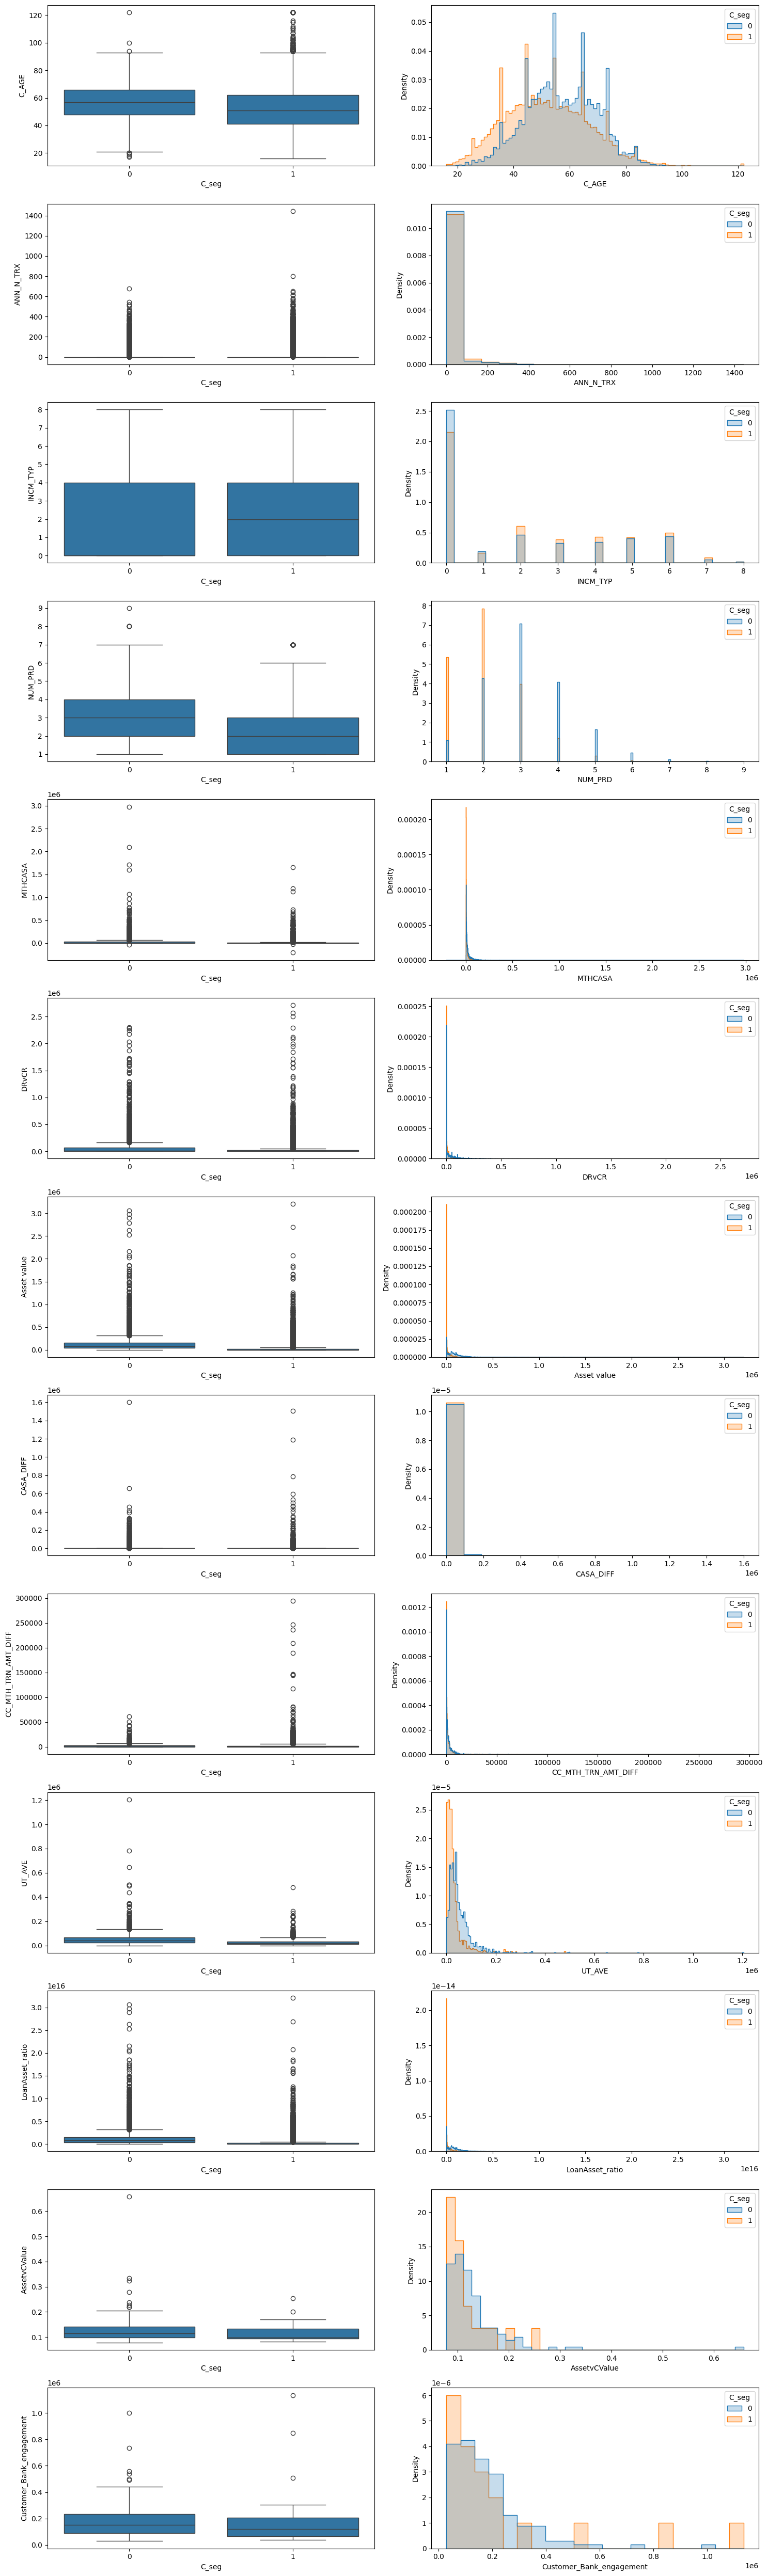

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

df['C_seg'] = df['C_seg'].astype('category')
df['C_seg'] = df['C_seg'].cat.codes

# List of columns to create boxplots for
columns = ["C_AGE", 'ANN_N_TRX', 'INCM_TYP', 'NUM_PRD', 'MTHCASA', 'DRvCR','Asset value',"CASA_DIFF","CC_MTH_TRN_AMT_DIFF", 
           'UT_AVE', 'LoanAsset_ratio','AssetvCValue', 'Customer_Bank_engagement']

# Calculate number of rows needed for subplots
nrows = int(len(columns))

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(15, 50))

# Create a boxplot and histogram on each subplot
for i, col in enumerate(columns):
    row = i 
    # col = 
    
    # Create boxplot
    sns.boxplot(x='C_seg', y=columns[i], data=df, ax=axes[row, 0])
    sns.histplot(data=df, x=columns[i], hue='C_seg', ax=axes[row, 1], element="step", stat="density", common_norm=False)

    # Create histogram

plt.tight_layout()
plt.show()



#### Plot to visualize correlation between numerical features

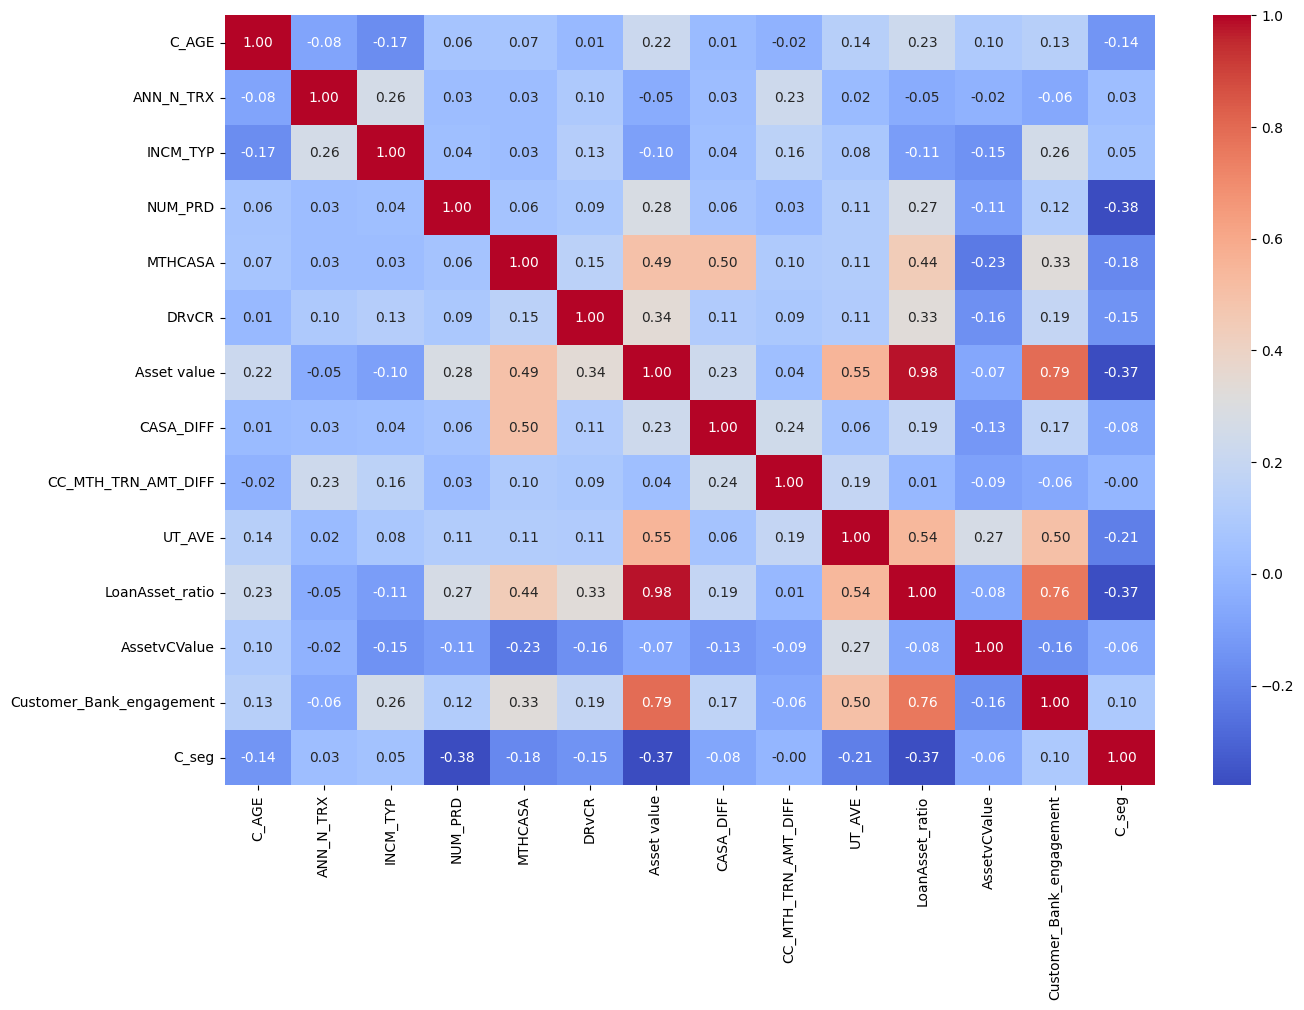

In [19]:
# create correlation graph with heatmap on specific column list
column_list = ['C_AGE', 'ANN_N_TRX', 'INCM_TYP', 'NUM_PRD', 'MTHCASA', 'DRvCR', 'Asset value', 'CASA_DIFF', 'CC_MTH_TRN_AMT_DIFF', 'UT_AVE', 'LoanAsset_ratio', 'AssetvCValue', 'Customer_Bank_engagement','C_seg']
corr = df[column_list].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

#### Create one-hot encoded columns for each product

In [17]:
# Fill any Null values with 0
column_list = ['CASA_DIFF','CC_MTH_TRN_AMT_DIFF','LoanAsset_ratio','AssetvCValue','Customer_Bank_engagement']
df[column_list] = df[column_list].fillna(0)

In [91]:
df_cp = df.copy(deep=True)

#### Plot distribution of all products by their Customer segment

Insights:
1. maximum number of people who are Affluent holds CASA account followed by TD,CC,FUNDS and lastly LOAN.
2. There is a huge opportunity to upsell of different products within Affluent segment.
3. In TD account type , customers have a GAP between who are not affluent and owns TD account. More conversions seems possible from Normal to Affleunt in this product type.

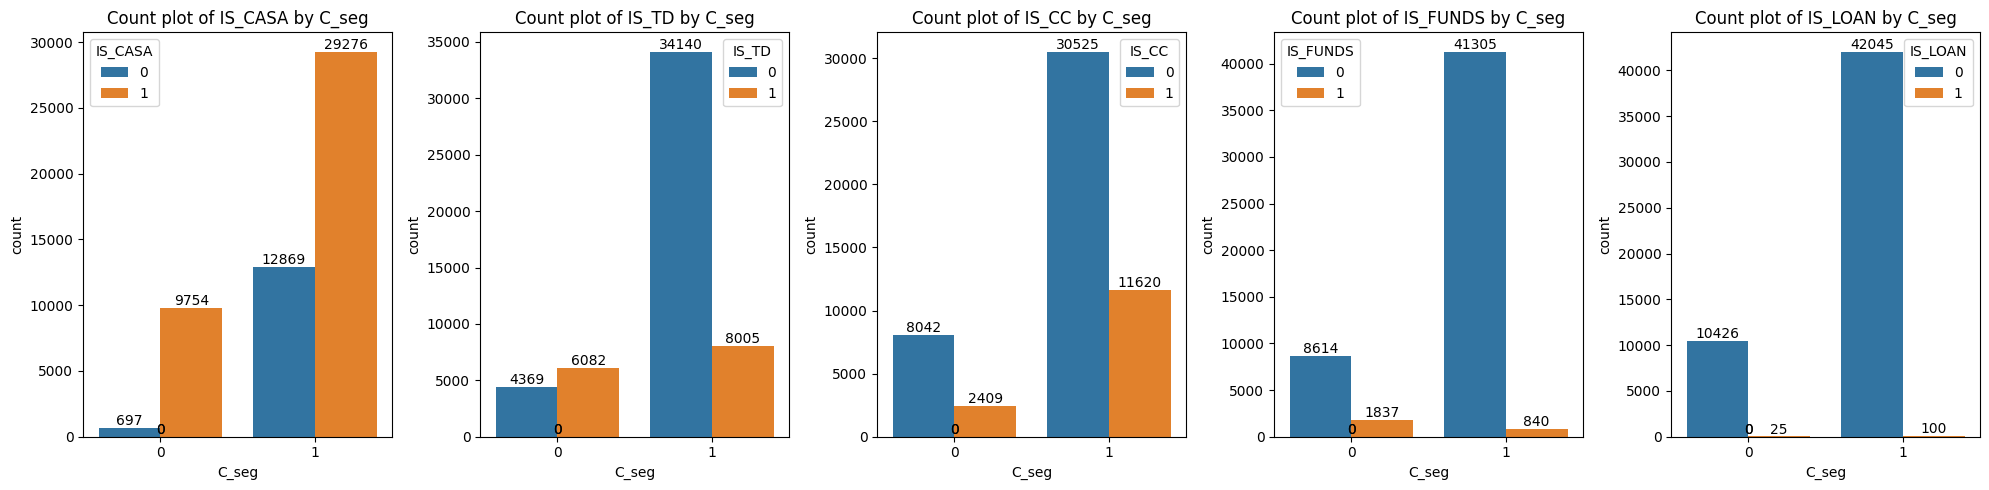

In [132]:
columns = [ 'IS_CASA', 'IS_TD', 'IS_CC', 'IS_FUNDS', 'IS_LOAN']

# Check if the columns exist in the dataframe
missing_columns = [col for col in columns if col not in df.columns]
if missing_columns:
    raise ValueError(f"The following columns are missing in the dataframe: {', '.join(missing_columns)}")

# show count graph for each column
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))
for i, col in enumerate(columns):
    sns.countplot(x='C_seg', hue=col, data=df, ax=axes[i])
    # provide title for each plot
    axes[i].set_title(f"Count plot of {col} by C_seg")
    # display count on each bar
    for p in axes[i].patches:
        axes[i].annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

In [18]:
# Show Loan product count by customer segment.
df.groupby(['IS_LOAN']).C_seg.value_counts()

IS_LOAN  C_seg
0        1        42045
         0        10426
1        1          100
         0           25
Name: count, dtype: int64

#### Visualize Customer segment data after data processing

Obviosuly we can see that data is skewed towards category = 0(affluent) , rightly so there are fewer affluent and that's why we want to have more people in affluent category.

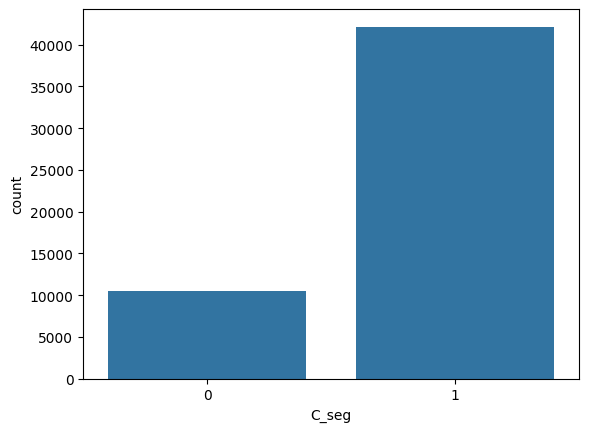

In [19]:
# visualize C_seg column with 2 category
sns.countplot(x='C_seg', data=df) 
plt.show()

### Model Training

In [20]:
filtered_feature_columns = ['Age_Group','C_EDU_Encoded','C_HSE_Encoded','C_OCC_Encoded','INCM_TYP','NUM_PRD','IS_CASA','CASATD_CNT','CASA_DIFF','DRvCR','IS_TD','IS_FUNDS','IS_CC','IS_LOAN','CC_MTH_TRN_AMT_DIFF','CC_LMT','LoanAsset_ratio','AssetvCValue','Customer_Bank_engagement','C_seg']

#create dataframe with fileterd columns
df_filtered = df[filtered_feature_columns]

In [97]:
# save the filtered dataframe to csv
df_filtered.to_csv('filtered_data.csv', index=True)

In [99]:
# read filtered data from csv, using proper data type and with index
df_filtered_csv = pd.read_csv('filtered_data.csv',index_col=0 ,dtype={'Age_Group': 'int64', 'C_EDU_Encoded': 'int64', 'C_HSE_Encoded': 'int64', 'C_OCC_Encoded': 'int64', 'INCM_TYP': 'int64', 'NUM_PRD': 'int64', 'IS_CASA': 'int64', 'CASATD_CNT': 'int64', 'CASA_DIFF': 'float64', 'DRvCR': 'float64', 'IS_TD': 'int64', 'IS_FUNDS': 'int64', 'IS_CC': 'int64', 'IS_LOAN': 'int64', 'CC_MTH_TRN_AMT_DIFF': 'int64', 'CC_LMT': 'int64', 'LoanAsset_ratio': 'float64', 'AssetvCValue': 'float64', 'Customer_Bank_engagement': 'float64', 'C_seg': 'int8'})

In [ ]:
data_dictionary = {
    'Age_Group': 'Age group of the customer, ranges from 0 to 5',
    'C_EDU_Encoded': 'Encoded Education level of the customer, ranges from 0 to 3',
    'C_HSE_Encoded': 'Encoded Housing status of the customer, ranges from 0 to 5',
    'C_OCC_Encoded': 'Encoded Occupation of the customer, ranges from 0 to 2',
    'INCM_TYP': 'Income level code, ranges from 0 to 8',
    'NUM_PRD': 'Number of distinct products held',
    'IS_CASA': 'Indicator if the customer has a Current Account and Savings Account',
    'CASATD_CNT': 'Number of Current/savings(CASA) and Time deposit accounts held',
    'CASA_DIFF': 'Difference in CASA over a period',
    'DRvCR': 'The ratio of total debit amount by total credit amount in a Year',
    'IS_TD': 'Indicator if the customer has a Time Deposit',
    'IS_FUNDS': 'Indicator if the customer has Funds',
    'IS_CC': 'Indicator if the customer has a Credit Card',
    'IS_LOAN': 'Indicator if the customer has a Loan',
    'CC_MTH_TRN_AMT_DIFF': 'Difference in monthly credit card transaction amount',
    'CC_LMT': 'Credit card limit',
    'LoanAsset_ratio': 'Ratio of the customer\'s Loan assets to their total assets',
    'AssetvCValue': 'Ratio of the customer\'s assets to the number of products they have',
    'Customer_Bank_engagement': 'Level of customer engagement with the bank',
    'C_seg': 'Customer segment'
}

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from xgboost import XGBClassifier


In [22]:
# Split the data into features and target variable
X = df_filtered.drop('C_seg', axis=1)
y = df_filtered['C_seg']

### Train Random Forest Classifier

In [24]:
# Initialize the RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
# Initialize StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [37]:
# Make cross-validated predictions
y_pred_cv = cross_val_predict(clf, X, y, cv=cv, method='predict_proba')

In [74]:
from typing import Any, List, Tuple
def get_hidden_affluent_customers(X: Any, y_true: Any, predicted_labels: Any) -> List:
    """
    Function to get the hidden affluent customers.

    Parameters:
    X (array-like): The input data.
    y_true (array-like): The true labels.
    predicted_labels (array-like): The predicted labels.

    Returns:
    hidden_affluent_customers_cv (array-like): The hidden affluent customers identified.
    """
    hidden_affluent_customers_cv = X[(predicted_labels == 0) & (y_true == 1)]  # identify original label as 1(Normal) and predicted label as 0(Hidden Affluent)
    print("\nNumber of hidden affluent customers identified:", len(hidden_affluent_customers_cv))

    return hidden_affluent_customers_cv


def get_classification_report(X: Any, y_true: Any, y_pred_proba: Any, threshold_in: float = 0.5, model_name: str = None, show_hidden_affluent: bool = True) -> Tuple[float, float, float, float, List]:
    """
    Get classification report for the model
    """
    positive_probs = y_pred_proba[:, 1]

    # Define threshold to classify as affluent customer
    threshold = threshold_in  # Example threshold (can be adjusted based on business requirements)
    # Classify instances based on threshold
    predicted_labels = (positive_probs >= threshold).astype(int)

    ### Code for classification evaluation metrics
    # Compute precision, recall, and F1-score
    precision = precision_score(y_true, predicted_labels, pos_label=0)
    recall = recall_score(y_true, predicted_labels, pos_label=0)
    f1 = f1_score(y_true, predicted_labels, pos_label=0)

    # Print model name as big heading if provided
    if model_name:
        print("#" * 50)
        print(f'\t\t{model_name}')
        print("#" * 50)

    print("Cross-validated Precision for class 0 (affluent customers):", precision)
    print("Cross-validated Recall for class 0 (affluent customers):", recall)
    print("Cross-validated F1-score for class 0 (affluent customers):", f1)

    ### Code for Hidden Affluent Customers
    hidden_affluent_df = get_hidden_affluent_customers(X, y_true, predicted_labels)
    if show_hidden_affluent:
        print(hidden_affluent_df.head())

    #### Code for ROC-AUC curve
    # Compute ROC curve and ROC-AUC
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba[:, 1])
    roc_auc = roc_auc_score(y_true, y_pred_proba[:, 1])

    # Plot ROC curve with model name in title if provided
    plt.figure(figsize=(8, 6))
    if model_name:
        plt.title(f"Receiver Operating Characteristic (ROC) Curve - {model_name}")
    else:
        plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

    return precision, recall, f1, roc_auc, hidden_affluent_df

    

##################################################
		Random Forest Classifier
##################################################
Cross-validated Precision for class 0 (affluent customers): 0.6238339552238806
Cross-validated Recall for class 0 (affluent customers): 0.5119127356233854
Cross-validated F1-score for class 0 (affluent customers): 0.5623587533505019

Number of hidden affluent customers identified: 3226


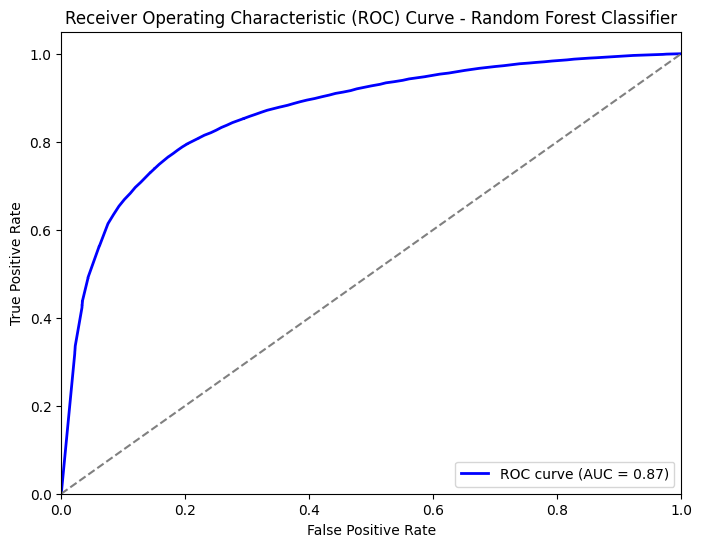

In [75]:
# get classification report
_ = get_classification_report(X,y, y_pred_cv,threshold_in=.50,model_name='Random Forest Classifier',show_hidden_affluent=False)


### Train XGBoost classifier, with GridSearchCV for hyperparameter tuning

In [80]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth': [4, 8],  
    'learning_rate': [0.1, 0.05],  
    'n_estimators': [100, 200], 
    'subsample': [0.8, 1],  
    'colsample_bytree': [0.9, 1] ,
    'gamma': [0, 0.1],
    'reg_lambda': [1, 5],
    'reg_alpha': [0, 1]
}

# Initialize the XGBoost classifier
xgb = XGBClassifier(objective= 'binary:logistic',seed=42)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(xgb, parameters, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Get the best parameters
best_params = grid_search.best_params_
best_params

In [88]:
print(best_params)

# Train and predict using the best parameters
xgb_best = XGBClassifier(objective= 'binary:logistic',seed=42,**best_params)
y_pred_xgb_proba = cross_val_predict(xgb_best, X, y, cv=5, method='predict_proba')

{'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 0.8}


##################################################
		XGBoost Classifier
##################################################
Cross-validated Precision for class 0 (affluent customers): 0.675573002405977
Cross-validated Recall for class 0 (affluent customers): 0.5104774662711702
Cross-validated F1-score for class 0 (affluent customers): 0.5815347721822542

Number of hidden affluent customers identified: 2562


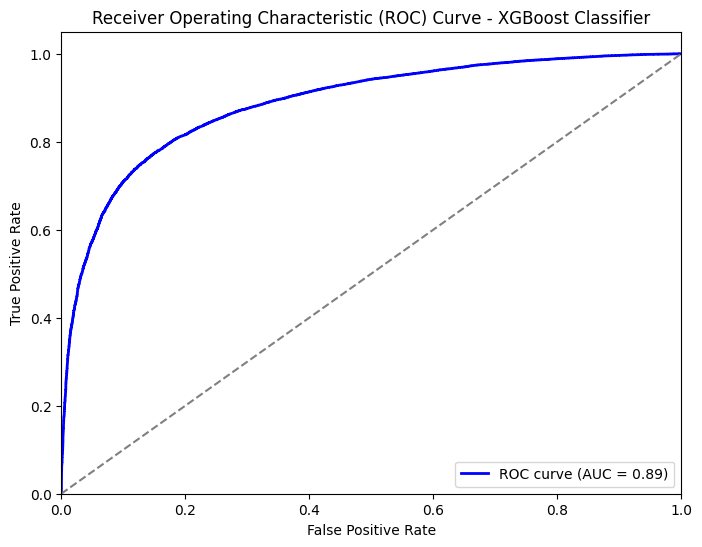

In [90]:
# get classification report
_ = get_classification_report(X,y, y_pred_xgb_proba,threshold_in=.50,model_name='XGBoost Classifier',show_hidden_affluent=False)